In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pingouin
from statsmodels.stats.multicomp import pairwise_tukeyhsd
sns.set_style('darkgrid')

## Подготовка данных

In [3]:
df = pd.read_csv('AB_lesson4.csv')

In [4]:
df.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30000 non-null  int64 
 1   group   30000 non-null  object
 2   events  30000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 703.3+ KB


In [6]:
df.describe()

,id,events
count,30000.000000,30000.000000
mean,14999.500000,31.554500
std,8660.398374,10.878761
min,0.000000,-7.000000
25%,7499.750000,24.000000
50%,14999.500000,31.000000
75%,22499.250000,39.000000
max,29999.000000,75.000000


In [7]:
df.group.value_counts()

group
A    10000
B    10000
C    10000
Name: count, dtype: int64

In [10]:
df.duplicated().sum()

0

In [13]:
group_A = df[df['group'] == 'A']
group_B = df[df['group'] == 'B']
group_C = df[df['group'] == 'C']

## Проверка на гомоскедастичность

Применим тест Левена:

$H_{0}$: Дисперсии внутри экспериментальных групп одинаковы

$H_{1}$: Дисперсии внутри экспериментальных групп отличаются

In [23]:
st.levene(group_A.events, group_B.events, group_C.events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

На уровне значимости 0.05 **не отвергаем** нулевую гипотезу о **равенсте** дисперсий

## Проверка на нормальность

Визуально оценим график распределения по каждой группе:

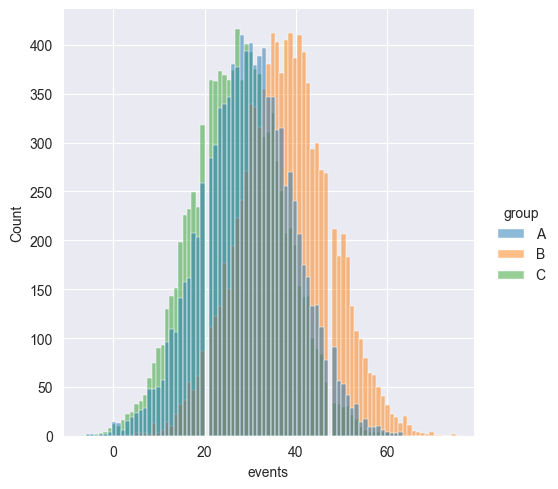

In [50]:
sns.displot(data=df, x='events', hue='group')

Также воспользуемся тестом Агостино-Пирсона:

In [33]:
print([st.normaltest(group, nan_policy='omit').pvalue for group in (group_A.events, group_B.events, group_C.events)])

[0.3493328906085719, 0.6566948749848232, 0.19753037588314626]


На уровне значимости 0.05 **не отвергаем** нулевую гипотезу о **нормальности** распределения по каждой группе

Сравним полученные результаты с QQ-plot:

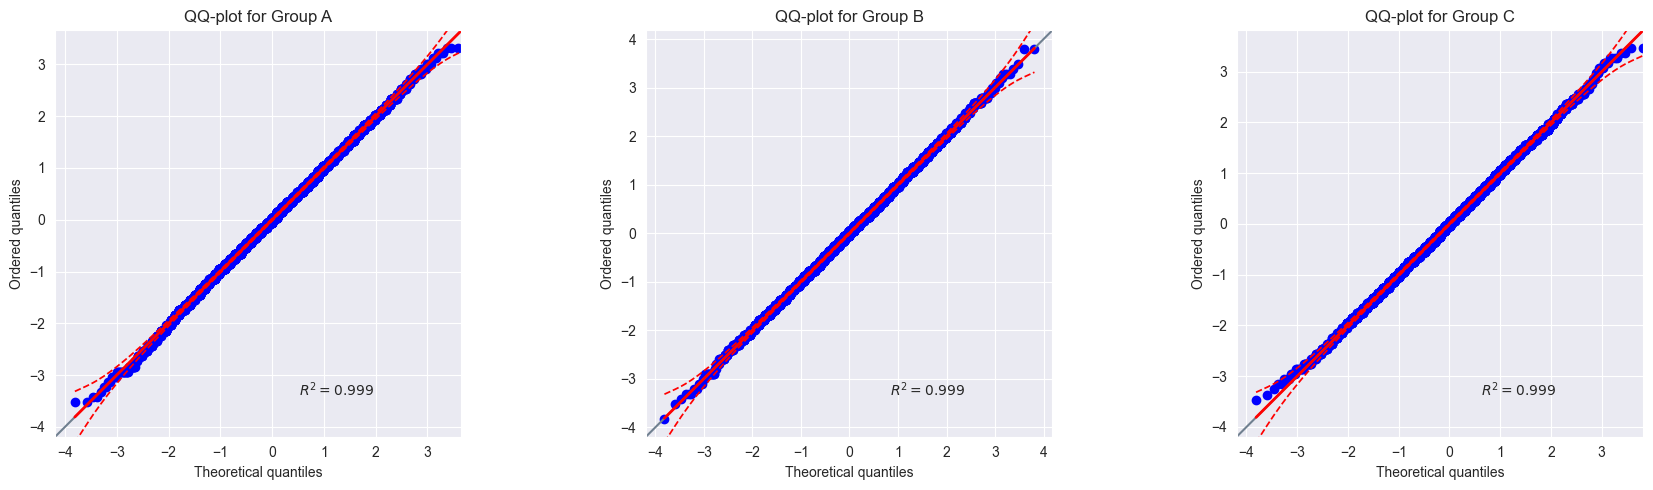

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

pingouin.qqplot(group_A.events, ax=axs[0])
axs[0].set_title('QQ-plot for Group A')

pingouin.qqplot(group_B.events, ax=axs[1])
axs[1].set_title('QQ-plot for Group B')

pingouin.qqplot(group_C.events, ax=axs[2])
axs[2].set_title('QQ-plot for Group C')

plt.tight_layout()
plt.show()

Данные в каждой группе показывают некоторые отклонения от теоретического нормального распределения, особенно на концах распределения

## ANOVA test

In [54]:
st.f_oneway(group_A.events, group_B.events, group_C.events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [59]:
pairwise_tukeyhsd(endog=df['events'], groups=df['group'], alpha=.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.0,7.7038,8.3642,True
A,C,-2.1093,0.0,-2.4395,-1.7791,True
B,C,-10.1433,0.0,-10.4735,-9.8131,True


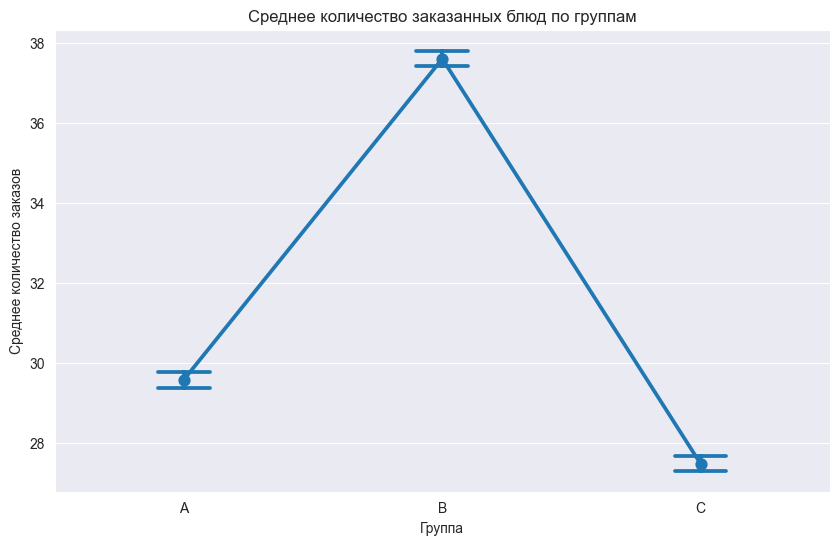

In [61]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='group', y='events', data=df, capsize=.2)
plt.title('Среднее количество заказанных блюд по группам')
plt.xlabel('Группа')
plt.ylabel('Среднее количество заказов')
plt.show()